In [31]:
import ai_framework.ml_data_preprocessing as mdp
import ai_framework.ml_feature_selection as mfs
import ai_framework.ml_tuning_calib_interpret as mtci
import ai_framework.utils as ut

import numpy as np
import pandas as pd


from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data['feature_names']

In [3]:
path = 'tutorial/run_1/breast_cancer'
prefix = 'all_features'

ut.save_prepared_dataset_bundle(
    output_dir=path,
    X_raw=X,
    y=y,
    feature_names=feature_names,
    prefix=prefix,
)

✅ Saved 3 artifact(s) to: C:\Users\neyot\EEG_data\AI_framework\tutorial\tutorial\run_1\breast_cancer


WindowsPath('tutorial/run_1/breast_cancer')

## Bundle structure (important)
The feature pipeline returns a single Python **dictionary** called `bundle` that packages the epoch-level feature matrix
and all supporting mappings/metadata needed for modeling and traceability. Conceptually, this is an **epoch-level**
supervised dataset where **rows are epochs**, **columns are features**, `y` stores the class label per epoch, and
`groups` stores the subject/group ID per epoch.

### What each key means
There are eight primary entries in `bundle`:

1) **`X_raw`**
- The EEG feature matrix (numeric features per epoch).
- Shape: `(n_epochs, n_features)` (e.g., `(11926, 7466)`).
- Interpretation: `X_raw[i, :]` are the features for epoch `i`.
- Column order is defined by `feature_names` (do not reorder columns unless you reorder names too).

2) **`y`**
- Integer class labels per epoch.
- Shape: `(n_epochs,)`.
- Interpretation: `y[i]` is the label ID for epoch `i` (IDs come from `label_to_id`).

3) **`groups`**
- Integer group IDs per epoch (typically the subject index).
- Shape: `(n_epochs,)`.
- Interpretation: `groups[i]` tells you which subject epoch `i` came from.
- Important: use `groups` for group-aware splitting to prevent subject leakage.

4) **`label_to_id`**
- Mapping from label string to integer ID used in `y`.
- Example: `{"ASD": 1, "TD": 0}`.
- Important: many utilities assume the **positive class is `1`**, so ensure the disease/class-of-interest is encoded
  as `1`.

5) **`group_id_to_key`**
- Mapping from group ID (in `groups`) back to subject identity.
- Format: `group_id -> (label_string, subject_id)`.
- Example: `0 -> ("ASD", "NDARAH371ZT7")`.

6) **`feature_names`**
- Ordered list of feature column names.
- Length: `n_features`.
- Guarantee: `feature_names[j]` corresponds to column `j` in `X_raw`.

7) **`metadata`**
- Original subject/file-level metadata (typically one row per subject/file).
- This is not epoch-level; it is used for joining subject attributes (e.g., demographics, recording/site fields) to
  subject IDs.

8) **`info_dict`**
- Optional diagnostic/build information returned by the dataset constructor.
- Empty lists (`[]`) indicate no detected gaps for that subject under that definition.



In [4]:
# Load bundle dataset
# -----------------------------------------------------------------------------------------------------------------------------------
path = 'tutorial/run_1/breast_cancer'
prefix = 'all_features'
bundle = ut.load_prepared_dataset_bundle(output_dir=path, prefix=prefix, require=None,)
# -----------------------------------------------------------------------------------------------------------------------------------

In [14]:
df = pd.DataFrame(bundle['X_raw'],  
                  columns=bundle['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.379999,17.330000,184.600006,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990000,23.410000,158.800003,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570000,25.530001,152.500000,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910000,26.500000,98.870003,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540001,16.670000,152.199997,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450001,26.400000,166.100006,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690001,38.250000,155.000000,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980000,34.119999,126.699997,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740000,39.419998,184.600006,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
df_v2, tab_meta = mdp.encode_categorical_and_ordinal( df=df ,
                                                 cat_cols=[], # explicitly mark categorical columns (none here)
                                                ord_cols=[], # explicitly mark ordinal columns (none here)
                                                low_card_max=3,
                                                ordinal_card_max=10,
                                                drop_first=True,
                                                return_metadata =True)
df_v2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.379999,17.330000,184.600006,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990000,23.410000,158.800003,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570000,25.530001,152.500000,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910000,26.500000,98.870003,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540001,16.670000,152.199997,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450001,26.400000,166.100006,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690001,38.250000,155.000000,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980000,34.119999,126.699997,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740000,39.419998,184.600006,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
bundle['X_raw'] = df_v2.to_numpy()
bundle['feature_names'] = list(df_v2.columns)

### Explore data missingness and run data preprocessing

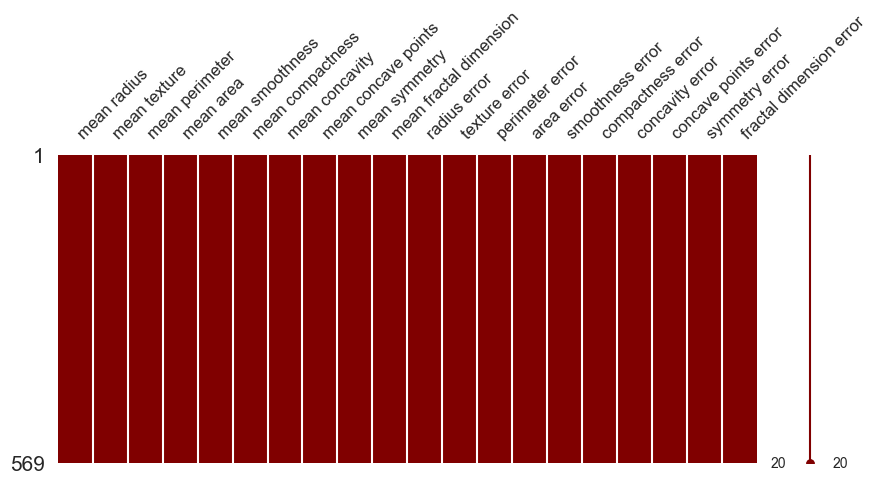

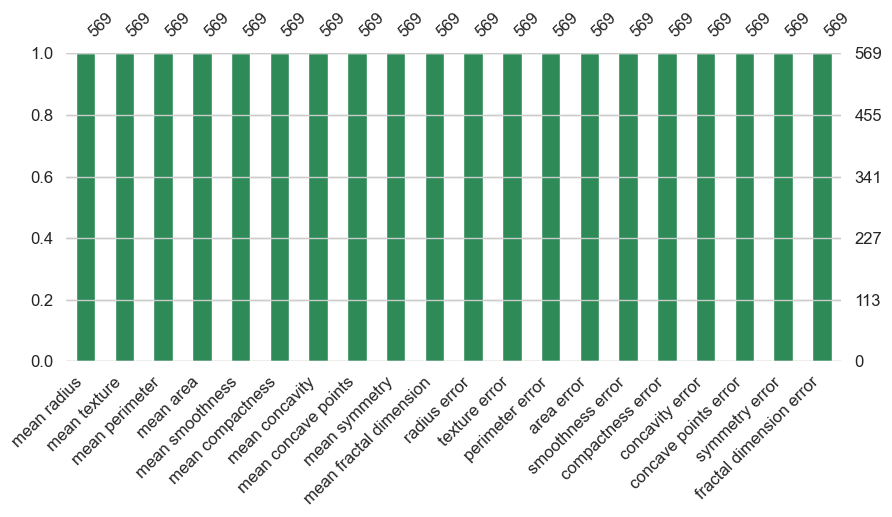

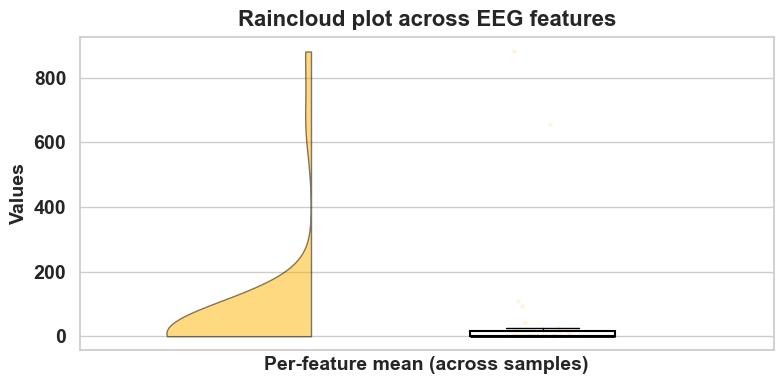

In [22]:

# Quick overview per epoch/feature, first 20 features
mdp.visualize_missingness(
    X_raw=bundle['X_raw'],
    feature_names=bundle['feature_names'],
    kind="matrix",
    max_features=20,
    figsize=(10, 4),
    fontsize=12,
    color="maroon",
    sort="ascending",
)

# Non-missing counts per feature, different style
mdp.visualize_missingness(
    X_raw=bundle['X_raw'],
    feature_names=bundle['feature_names'],
    kind="bar",
    max_features=20,
    figsize=(10, 4),
    fontsize=12,
    color="seagreen",
    sort="ascending",
)

summary_raw = mdp.summarize_feature_matrix(bundle['X_raw'], bundle['feature_names'])
mdp.plot_feature_stat_raincloud(summary_raw, stat="mean",  figsize=(8, 4), font_size=14, violin_half="right" )



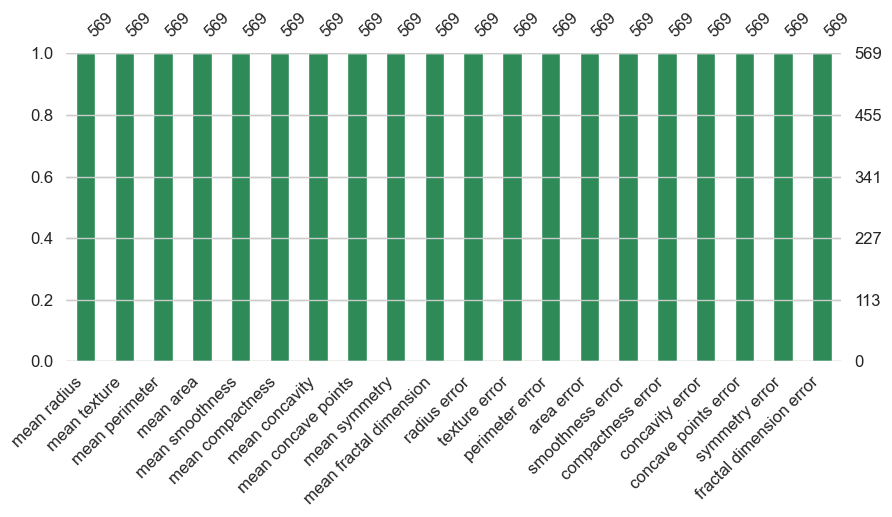

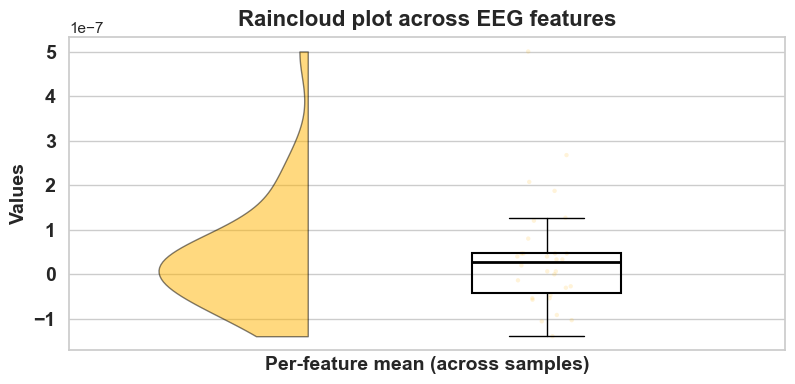

In [24]:


# Run data preprocessing
bundle = mdp.data_preprocessing_pipeline(
    bundle=bundle,
    lower_q = 0.05,
    upper_q = 0.95,
    impute_strategy = "median",
    preproc_key = "preproc",
    meta=None, # use tab_meta if you have additional metadata such as Age and Gender
)

# After scaling: re-check
# Quick overview per epoch/feature, first 20 features
# Non-missing counts per feature, different style
mdp.visualize_missingness(
    X_raw=bundle['X_scaled'],
    feature_names=bundle['feature_names'],
    kind="bar",
    max_features=20,
    figsize=(10, 4),
    fontsize=12,
    color="seagreen",
    sort="ascending",
)

summary_scaled = mdp.summarize_feature_matrix(bundle['X_scaled'], bundle['feature_names'])
mdp.plot_feature_stat_raincloud(summary_scaled, stat="mean",  figsize=(8, 4), font_size=14, violin_half="right" )



### Save/Load Preprocessed EEG Features (Winsorization, Imputation, Standard Scaling, and Fitted Preprocessors)

In [32]:
# All features
# -----------------------------------------------------------------------------------------------------------------------------------
path = 'tutorial/run_1/breast_cancer'
prefix = 'all_features_preproc'
mtci.save_all_results( output_dir=path, all_results = bundle,prefix=prefix,compress=True,)
bundle = mtci.load_all_results(output_dir=path,prefix=prefix,compress=True)
# -----------------------------------------------------------------------------------------------------------------------------------



✅ Saved all_results to: C:\Users\neyot\EEG_data\AI_framework\tutorial\tutorial\run_1\breast_cancer\all_features_preproc.pkl.gz
✅ Loaded all_results from: C:\Users\neyot\EEG_data\AI_framework\tutorial\tutorial\run_1\breast_cancer\all_features_preproc.pkl.gz


In [34]:
X_temp = pd.DataFrame(bundle['X_scaled'], columns=bundle['feature_names']).head()
X_temp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.239060,-1.574262,1.446102,1.197623,1.794426,2.253707,2.250775,2.227656,2.094452,2.234912,...,2.109233,-1.464753,2.166505,2.393411,1.466090,2.327230,2.202062,1.973632,2.340024,2.311079
1,2.051465,-0.371913,1.910634,2.225192,-0.914224,-0.511555,0.018428,0.640089,0.026126,-0.977300,...,2.020008,-0.382502,1.740235,2.282176,-0.394316,-0.453237,-0.130635,1.154147,-0.261724,0.369808
2,1.774366,0.521759,1.777254,1.869802,1.086282,1.216149,1.598459,2.227656,1.099551,-0.428147,...,1.695135,-0.005139,1.531084,1.769580,0.603714,1.298917,0.974377,1.973632,1.450162,0.276253
3,-0.829739,0.298341,-0.633714,-0.848533,1.825005,2.253707,2.227612,1.640853,2.094452,2.234912,...,-0.286130,0.167523,-0.249358,-0.598943,1.933128,2.327230,2.202062,1.973632,2.340024,2.351358
4,1.963297,-1.252745,2.011820,2.182599,0.337903,0.639964,1.607039,1.615141,0.013596,-0.620020,...,1.459488,-1.582234,1.521124,1.491492,0.264578,-0.317720,0.707650,0.775948,-1.027411,-0.425412


## Feature selection pipeline (constant + collinearity pruning)

This section performs **feature filtering** in two sequential stages to reduce noise, redundancy, and instability before model training.

---

### Stage 1 — Drop constant / quasi-constant features

A **constant feature** is a column that takes the **same value for every sample** (e.g., all zeros). Since it never changes, it provides **no information** to a model and can be safely removed.

We drop constant features using `drop_constant_features`, which supports:

- **Global constant**: the feature is constant across **all samples**.
- **Local constant**: the feature is constant **within each subject/group** (based on `groups`).
  We then drop it if the feature is constant in at least `local_frac` fraction of eligible groups.

Key knobs:
- `mode`: `"global"`, `"local"`, or `"both"` (global then local).
- `local_frac`: how strict local constancy should be (e.g., `1.0` = constant in all groups).
- `min_group_samples`: ignore tiny groups with too few samples.

This step outputs a reduced matrix and updated feature list.

---

### Stage 2 — Pairwise collinearity pruning (correlation threshold)

Next, we remove **pairwise collinear features** using `remove_pairwise_collinear_features`.

What this does:
- Computes an **absolute correlation** matrix between features (default: **Spearman** correlation).
- Uses **current column order as priority**:
  if two features are highly correlated, the earlier feature is kept and the later one is dropped.
- Drops feature `j` when `|corr(i, j)| >= threshold` and `i < j`.

Group-aware option (when `groups` are provided):
- Builds a more robust correlation estimate by repeating `N` subsamples:
  each subsample selects **one row per group**, computes a correlation matrix, and averages across `N` iterations.
- This helps reduce bias from unequal group sizes or repeated measurements.

Outputs from this stage include:
- the further-pruned feature matrix,
- updated feature names,
- a removal log indicating which feature was dropped, which was kept, and the correlation value at the time of removal.

---

### Why use both stages?
- **Constant feature removal** eliminates features that cannot help any model.
- **Collinearity pruning** removes redundant features so the model is less sensitive to correlated inputs and easier to interpret.

Both stages are controlled via config dictionaries (`constant_cfg`, `collinearity_cfg`), each containing an `enable` flag so stages can be switched on/off without rewriting code.


In [39]:
%%time

fs_out = mfs.run_feature_selection_pipeline(
    X_raw=bundle["X_scaled"],                 # Feature matrix (n_samples, n_features) to run selection on (here: scaled features)
    feature_names=bundle["feature_names"],    # List of feature names aligned to X_raw columns
    groups=None,                   # Group IDs per row (used for "local" constant checks + group-aware correlation bootstrapping)

    constant_cfg={
        "enable": True,                       # If True, run the constant/quasi-constant feature removal stage
        "mode": "global",                       # "global" (all samples), "local" (within groups), or "both" (global then local)
        "tol_global": 1.0,                    # Global step: drop only truly-constant features across all samples (tol=1.0)
        "tol_local": 1.0,                     # Local step: drop only truly-constant features within each group (tol=1.0)
        "local_frac": 1.0,                    # Drop feature if it's constant in >= this fraction of groups (1.0 = constant in ALL groups)
    },

    collinearity_cfg={
        "enable": True,                       # If True, run the pairwise collinearity pruning stage
        "methods_config": {                   # How to compute correlations for collinearity checks
            "corr": {
                "method": "spearman",         # Correlation type ("spearman" recommended for monotonic/rank relationships)
                "min_periods": 1,             # Minimum observations required per pairwise correlation
                "numeric_only": False,        # Use all columns (X is numeric anyway; kept for consistency)
            }
        },
        "N": 1000,                               # If groups is provided: number of bootstrap subsamples (one row per group) to average corr matrices over
        "threshold": 0.8,                     # Drop feature j if |corr(i, j)| >= threshold (keeping earlier feature i, dropping later j)
        "parallelize": True,                  # If True (and groups provided), parallelize the N bootstrap correlation computations
        "n_jobs": -1,                         # Number of parallel workers (-1 = use all CPU cores)
    },
)



Feature selection pipeline:   0%|          | 0/2 [00:00<?, ?stage/s]

CPU times: total: 15.6 ms
Wall time: 9.91 ms


In [41]:
fs_out

{'X': array([[ 1.2390598 , -1.5742615 ,  1.7944263 , ...,  1.4660904 ,
          2.3400242 ,  2.3110785 ],
        [ 2.051465  , -0.37191296, -0.914224  , ..., -0.39431646,
         -0.2617238 ,  0.36980766],
        [ 1.7743658 ,  0.52175903,  1.0862825 , ...,  0.60371417,
          1.4501616 ,  0.27625272],
        ...,
        [ 0.8013689 ,  2.0368927 , -0.9295133 , ..., -0.8739528 ,
         -1.317023  , -0.3331559 ],
        [ 2.0533545 ,  2.0368927 ,  1.7461436 , ...,  1.6017452 ,
          2.3400242 ,  2.3513582 ],
        [-1.4251254 ,  1.366639  , -1.6946304 , ..., -1.7540607 ,
         -0.02170312, -0.84056276]], shape=(569, 15), dtype=float32),
 'feature_names_selected': ['mean radius',
  'mean texture',
  'mean smoothness',
  'mean compactness',
  'mean symmetry',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'smoothness error',
  'concavity error',
  'symmetry error',
  'fractal dimension error',
  'worst smoothness',
  'worst symmetry',
  'worst fract

## Config-driven rank → aggregate → select (coarse + final)
### Feature ranking with **compute_feature_mean_ranks**

`compute_feature_mean_ranks` runs one or more feature scoring methods (e.g. PhiK, MRMR, ReliefF) and returns **mean ranks** for each feature:

- If `groups is None`: run each method **once** on the full `(X, y)` and rank features.
- If `groups` is provided: do **N bootstraps**, each time sampling one row per group, scoring features, and ranking them; then average ranks across bootstraps.

The result is a dict of DataFrames like `"phik_feat_ranking"`, each with:

- `feature` – feature index  
- `mean_rank` – lower = better (if `ascending=True`) 

This notebook uses a **two-stage, config-driven feature ranking pipeline** that wraps three core functions:

- `mfs.compute_feature_mean_ranks(...)`  (bootstrap feature ranking)
- `mfs.aggregate_feature_rankings(...)` (combine rankings across methods)
- `mfs.construct_X_from_ranked_features(...)` (subset `X` to top-k features)

The goal is to avoid repeating the same boilerplate code for “Step 3” (coarse pass) and “Step 4” (final ensemble pass).

---

### 1) Define the pipeline config: `RANK_SELECT_PIPELINE_CFG`

- **`methods`**: a registry of scoring methods and their parameters (defined once).
- **`stages`**: a sequence of rank→aggregate→select stages, where each stage lists method names, number of bootstrap iterations (`N`), and how many features to keep (`top_k`).

```python
RANK_SELECT_PIPELINE_CFG = {
    "defaults": {
    "ascending": True,   # True -> smaller mean_rank = better (top of DF)
    "random_state": 42,  # Seed for reproducible bootstraps / any stochastic scoring methods
    "parallelize": True, # If True, parallelize bootstrap iterations (when supported by the implementation)
    "n_jobs": -1,        # Number of worker processes/threads (-1 = use all available cores)
},
    "methods": {
        "phik": {},

        "mrmr_MIQ": {"mrmr_method": "MIQ", "regression": False},


        # skrebate family; "ALL" means: fill with current X.shape[1] at runtime
        "reliefF": {
            "n_neighbors": 100,
            "n_features_to_select": "ALL",
            "discrete_threshold": 2,
            "n_jobs": -1,
            "verbose": False,
        },
        "surf": {"n_features_to_select": "ALL", "discrete_threshold": 2, "n_jobs": 1},
    },

    # Two-stage rank→aggregate→select:
    #  - Stage 1 (coarse): run a small/cheap method set to quickly shrink the feature space to top_k (coarse filter).
    #  - Stage 2 (final): run a broader ensemble on the reduced feature set, then keep the final top_k features.
    "stages": [
        {
            "name": "coarse_rank_select",
            "method_names": ["mrmr_FCD"],
            "N": 1000,       # bootstrap iterations for this stage (set higher for stability in the coarse pass)
            "top_k": 150,
        },
        {
            "name": "final_rank_select",
            "method_names": [
                "phik",
                "mrmr_MIQ", "mrmr_MID", "mrmr_FCQ", "mrmr_FCD",
                "reliefF", "surf", "surfstar", "multisurf", "multisurfstar",
            ],
            "N": 1000,         # bootstrap iterations for this stage (often smaller since the feature set is already reduced)
            "top_k": 100,
        },
    ],
}


In [44]:
%%time

RANK_SELECT_PIPELINE_CFG = {
    # Global defaults applied to every stage (stage can override any of these)
    "defaults": {
        "ascending": True,  # True -> smaller mean_rank = better (top of DF)
        "random_state": 42, # Seed for reproducible bootstraps / any stochastic scoring methods
        "parallelize": True,  # If True, parallelize bootstrap iterations (when supported by the implementation)
        "n_jobs": -1,  # Number of worker processes/threads (-1 = use all available cores)
    },

    # Define each method ONCE here (registry)
    "methods": {

        # 1) PhiK – no extra parameters needed
        "phik": {},

        # 2) MRMR with Mutual Information + Ratio (MIQ)
        "mrmr_MIQ": {
            # internally used by compute_feature_scores -> MRMR(..., method="MIQ", ...)
            "mrmr_method": "MIQ",
            "regression": False,
            # all features continuous -> we can omit discrete_features,
            # it will default to [False] * n_features inside compute_feature_scores
            # "discrete_features": [False] * X.shape[1],
        },
        # 3) MRMR with Mutual Information + Difference (MID)
        "mrmr_MID": {
            "mrmr_method": "MID",
            "regression": False,
            # "discrete_features": [False] * X.shape[1],
        },
        # 4) MRMR with F-statistic + Correlation + Ratio (FCQ)
        "mrmr_FCQ": {
            "mrmr_method": "FCQ",
            "regression": False,
            # "discrete_features": [False] * X.shape[1],
        },
        # 5) MRMR with F-statistic + Correlation + Difference (FCD)
        "mrmr_FCD": {
            "mrmr_method": "FCD",
            "regression": False,
            # "discrete_features": [False] * X.shape[1],
        },
        # skrebate family; "ALL" means: fill with current X.shape[1] at runtime
        # 6) ReliefF (skrebate) – k-nearest-neighbors based feature scoring
        #    - n_neighbors controls how many neighbors are used for each instance
        #    - discrete_threshold: features with <= this many unique values are treated as discrete
        #    - outputs .feature_importances_ (one score per feature)
        "reliefF": {
            "n_neighbors": 100,
            "n_features_to_select": "ALL",  # number of features to select
            "discrete_threshold": 10,
            "n_jobs": 1,
            "verbose": False,
        },
        # 7) SURF (skrebate) – Relief-family method using a distance radius
        #    rather than fixed k-nearest neighbors to define “near” instances.
        #    - discrete_limit: features with <= this many unique values are treated as discrete
        #    - outputs .feature_importances_ (one score per feature)
        "surf": {
            "n_features_to_select": "ALL",  # number of features to select
            "discrete_threshold": 10,
            "n_jobs": 1,
        },

        # 8) SURFstar (skrebate) – SURF variant that also uses “far” instances
        #    (in addition to near instances) when updating feature scores.
        #    - same parameter interface as SURF in your setup
        "surfstar": {
            "n_features_to_select": "ALL",  # number of features to select
            "discrete_threshold": 10,
            "n_jobs": 1,
        },

        # 9) MultiSURF (skrebate) – Multi-class/generalized SURF-style scoring
        #    that adapts the neighborhood definition per instance (robust across data types).
        #    - same parameter interface as SURF in your setup
        "multisurf": {
            "n_features_to_select": "ALL",  # number of features to select
            "discrete_threshold": 10,
            "n_jobs": 1,
        },

        # 10) MultiSURFstar (skrebate) – MultiSURF variant that incorporates “far”
        #     instance information (star variant).
        #     - same parameter interface as SURF in your setup
        "multisurfstar": {
            "n_features_to_select": "ALL",  # number of features to select
            "discrete_threshold": 10,
            "n_jobs": 1,
        },
    },


    # Two-stage rank→aggregate→select:
    #  - Stage 1 (coarse): run a small/cheap method set to quickly shrink the feature space to top_k (coarse filter).
    #  - Stage 2 (final): run a broader ensemble on the reduced feature set, then keep the final top_k features.
    "stages": [
        {
            "name": "coarse_rank_select",   # Human-readable stage label (used in logs/history keys)
            "method_names": ["mrmr_FCD"],   # Which registered scoring methods to run in this stage
            "N": 500,                       # bootstrap iterations for this stage (set higher for stability in the coarse pass)
            "top_k": 20,                   # After aggregating ranks, keep only the top_k best features (this becomes the feature set passed to the next stage)
        },
        {
            "name": "final_rank_select",  # Final refinement stage (runs after the coarse filter)
            "method_names": [            # Broader ensemble of methods to score the reduced feature set
                "phik",
                "mrmr_MIQ", "mrmr_MID", "mrmr_FCQ", "mrmr_FCD",
                "reliefF", "surf", "surfstar", "multisurf", "multisurfstar",
            ],
            "N": 500,         # bootstrap iterations for this stage (often smaller since the feature set is already reduced)
            "top_k": 15,     # Final number of features to keep (output of the pipeline)
        },
    ],    
}






# After running the rank-select pipeline:
out = mfs.run_rank_select_pipeline(
    X=fs_out["X"],                   # Current design matrix to rank/select from (input features for this pipeline)
    y=bundle["y"],                            # Target vector used by supervised scoring methods (e.g., MRMR, Relief-family)
    groups=None,                  # Optional group IDs; when provided, bootstrapping/ranking is done group-aware
    feature_names=fs_out["feature_names_selected"],  # Names aligned to columns of X (used in ranking tables + for subset outputs)
    cfg=RANK_SELECT_PIPELINE_CFG,             # Config dict defining methods registry + stage definitions (coarse + final)
)


>>> Stage =  coarse_rank_select


Methods (ungrouped):   0%|          | 0/1 [00:00<?, ?it/s]

>>> Stage =  final_rank_select


Methods (ungrouped):   0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 9.5 s
Wall time: 9.54 s


In [45]:
out

{'X': array([[ 2.5977929 ,  1.2390598 ,  2.253707  , ...,  2.2349124 ,
          1.5629625 , -0.62852126],
        [ 0.6921205 ,  2.051465  , -0.51155543, ..., -0.9772999 ,
         -0.96436924, -1.0031735 ],
        [ 1.617885  ,  1.7743658 ,  1.2161487 , ..., -0.42814714,
          0.38385442, -0.8873242 ],
        ...,
        [ 0.2931393 ,  0.8013689 , -0.00850979, ..., -1.0087268 ,
         -1.0755469 , -0.25758493],
        [ 1.5281029 ,  2.0533545 ,  2.253707  , ...,  1.2540466 ,
          0.49972948,  0.87904936],
        [-0.03071807, -1.4251254 , -1.2561309 , ..., -0.61836576,
          1.0509197 ,  0.5140148 ]], shape=(569, 15), dtype=float32),
 'feature_names_selected': [np.str_('radius error'),
  np.str_('mean radius'),
  np.str_('mean compactness'),
  np.str_('mean texture'),
  np.str_('worst symmetry'),
  np.str_('worst smoothness'),
  np.str_('concavity error'),
  np.str_('fractal dimension error'),
  np.str_('mean symmetry'),
  np.str_('mean smoothness'),
  np.str_('sm

### Plot the aggregated ranking (coarse + final)

After running `run_rank_select_pipeline(...)`, the returned `out` dictionary contains per-stage outputs in `out["history"]`.  
Each stage entry includes an `agg_results` object (the output of `aggregate_feature_rankings(...)`), which can be passed directly into the plotting helper.

```python
# --- Coarse stage (Stage 1) ---
mfs.plot_aggregated_feature_ranking_barplot(
    agg_results=out["history"][0]["agg_results"],
    top_k=20,
    figsize=(10, 5),
    title="Top 20 Aggregated Features (Coarse Stage)",
)

# --- Final stage (last stage) ---
mfs.plot_aggregated_feature_ranking_barplot(
    agg_results=out["history"][-1]["agg_results"],
    top_k=20,
    figsize=(10, 5),
    title="Top 20 Aggregated Features (Final Stage)",
)


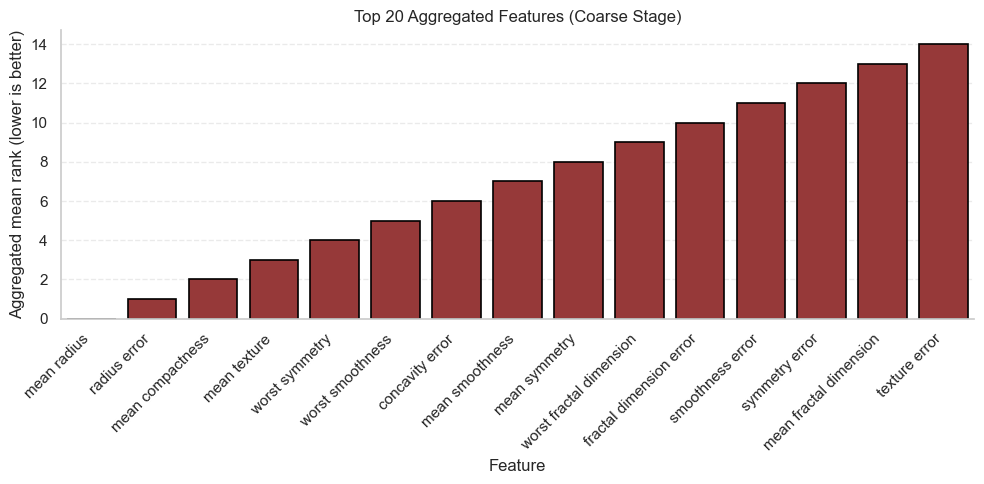

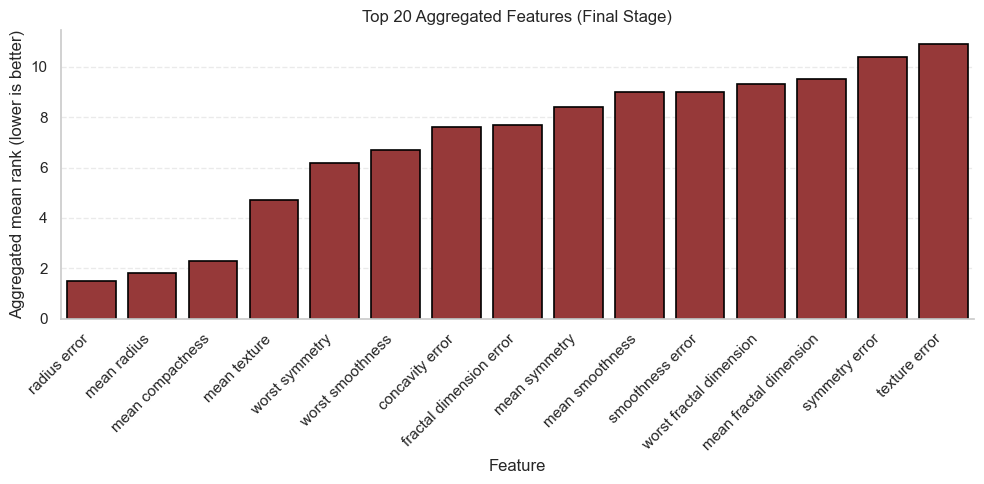

In [46]:
# --- Coarse stage (Stage 1) ---
mfs.plot_aggregated_feature_ranking_barplot(
    agg_results=out["history"][0]["agg_results"],
    top_k=20,
    figsize=(10, 5),
    title="Top 20 Aggregated Features (Coarse Stage)",
)

# --- Final stage (last stage) ---
mfs.plot_aggregated_feature_ranking_barplot(
    agg_results=out["history"][-1]["agg_results"],
    top_k=20,
    figsize=(10, 5),
    title="Top 20 Aggregated Features (Final Stage)",
)

### VIF-based multicollinearity removal

After pairwise pruning, we remove **remaining multicollinearity** using `remove_multicollinearity_features`.  
This step uses **Variance Inflation Factor (VIF)**, which measures how strongly each feature can be linearly predicted from the others (higher = more collinear):

- At each **elimination step**, it computes VIFs for all currently-retained features.
- If the largest VIF exceeds the configured threshold, that feature is removed.
- This repeats until all remaining features have VIF ≤ threshold (or only one feature remains).

**Modes**
- **`groups=None` (full-data VIF):** VIF is computed on the full dataset at each elimination step.
- **`groups` provided (group-aware VIF):** at each elimination step, it:
  1) samples **one row per group** and computes VIF,  
  2) repeats this **`N` times**,  
  3) averages the resulting VIF vectors, and  
  4) drops the feature with the largest **average VIF** if it exceeds the threshold.

> Note: `N` controls the number of subsamples **per elimination step** (not the number of times the whole algorithm runs).

**Parallelization (group-aware mode only)**
- When `parallelize=True`, the `N` bootstrap subsamples *within each elimination step* are computed in parallel (via joblib), which can significantly reduce runtime for large `N`.

The output is a further-pruned feature matrix, updated feature names, and a log of removed features with `reason="vif"` (full-data) or `reason="vif_grouped"` (group-aware).


In [48]:
# VIF-based multicollinearity removal (no groups)
out_vif = mfs.remove_multicollinearity_features(
    X=out['X'],              # np.ndarray of shape (n_samples, n_features):
                              # the original (or already-pruned) design matrix.

    groups=None,    # No group structure -> VIF is computed on the full
                              # dataset at each elimination step.

    methods_config={          # Configuration for the VIF-based elimination.
        "vif": {
            "threshold": 10.0,     # VIF cutoff: if max VIF > 10.0, the feature with
                                  # the largest VIF is removed.
            "cap": 1e6,           # Upper cap for VIF values (including inf) to avoid
                                  # numerical issues in degenerate cases.
        }
    },

    N=1000,                    # Number of bootstrap subsamples used ONLY when
                               # groups is not None. Here, with groups=None,
                               # this is effectively ignored.

    feature_names=out['feature_names_selected'],  # Sequence of feature names, length = n_features.
                                         # Used in VIF computation output and logs.

    random_state=42,          # Seed for RNG used in group-aware VIF mode
                              # (ignored here, but kept for a consistent API).
    # parallelization (grouped mode only)
    parallelize=True,
    n_jobs=-1,                          # use all cores (or set e.g. 8)
    backend="loky",                     # loky is faster for you
)



VIF elimination steps | groups=None (full data): 0step [00:00, ?step/s]

In [49]:
out_vif

{'X': array([[ 2.5977929 ,  1.2390598 ,  2.253707  , ...,  2.2349124 ,
          1.5629625 , -0.62852126],
        [ 0.6921205 ,  2.051465  , -0.51155543, ..., -0.9772999 ,
         -0.96436924, -1.0031735 ],
        [ 1.617885  ,  1.7743658 ,  1.2161487 , ..., -0.42814714,
          0.38385442, -0.8873242 ],
        ...,
        [ 0.2931393 ,  0.8013689 , -0.00850979, ..., -1.0087268 ,
         -1.0755469 , -0.25758493],
        [ 1.5281029 ,  2.0533545 ,  2.253707  , ...,  1.2540466 ,
          0.49972948,  0.87904936],
        [-0.03071807, -1.4251254 , -1.2561309 , ..., -0.61836576,
          1.0509197 ,  0.5140148 ]], shape=(569, 14), dtype=float32),
 'feature_names_selected': ['radius error',
  'mean radius',
  'mean compactness',
  'mean texture',
  'worst symmetry',
  'worst smoothness',
  'concavity error',
  'fractal dimension error',
  'mean symmetry',
  'mean smoothness',
  'smoothness error',
  'mean fractal dimension',
  'symmetry error',
  'texture error'],
 'logs': {'re

In [50]:
out_vif['logs']

{'removed_features': {11: {'removed_feature_index': 11,
   'removed_feature_name': 'worst fractal dimension',
   'reason': 'vif',
   'vif_value': 12.55997321629391}},
 'mode': 'ungrouped',
 'vif_threshold': 10.0,
 'vif_cap': 1000000.0,
 'N': 1000,
 'random_state': 42,
 'parallelize': True,
 'n_jobs': -1,
 'backend': 'loky',
 'n_features_start': 15,
 'n_features_selected': 14,
 'n_features_removed': 1}

In [ ]:
# Save final features
# -----------------------------------------------------------------------------------------------------------------------------------
path = 'tutorial/run_1/breast_cancer'
prefix = 'final_features'

ut.save_prepared_dataset_bundle(
    output_dir= path,
    X_raw=out_vif['X'],
    y=bundle['y'],
    groups=None,
    label_to_id=None,
    group_id_to_key=None,
    feature_names=out_vif['feature_names_selected'],
    metadata=bundle['metadata'],
    info_dict=bundle['info_dict'],   
    prefix=prefix,
)

# Load data 
# -----------------------------------------------------------------------------------------------------------------------------------
bundle = ut.load_prepared_dataset_bundle(output_dir= path, prefix=prefix, require=None,)




✅ Saved 3 artifact(s) to: C:\Users\neyot\EEG_data\AI_framework\tutorial\tutorial\run_1\breast_cancer


In [53]:
bundle['feature_names']

['radius error',
 'mean radius',
 'mean compactness',
 'mean texture',
 'worst symmetry',
 'worst smoothness',
 'concavity error',
 'fractal dimension error',
 'mean symmetry',
 'mean smoothness',
 'smoothness error',
 'mean fractal dimension',
 'symmetry error',
 'texture error']